# Capstone Webscrapping using BeautifulSoup 

This notebook contains guidances & tasks on the data processing for the application

## background

This web scraping contains the time series of Ethereum Sales Volume Data, to find out the analysis of the movement of transaction volume within a certain period

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [47]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [48]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n<link rel="preload" href="h'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.
in this section we have to find the right key to retrieve the attribute

In [50]:
table = soup.find('table', attrs={'class':'table table-striped text-sm text-lg-normal'})
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [51]:
row = table.find_all('tr', attrs={'class':''})
row_length = len(row)
row_length

548

In [52]:
row[0]

<tr>
<th class="text-center">Date</th>
<th class="text-center">Market Cap</th>
<th class="text-center">Volume</th>
<th class="text-center">Open</th>
<th class="text-center">Close</th>
</tr>

In [53]:
row[1].th.text

'2021-06-30'

In [54]:
row[1].find_all('td')[0].text

'\n$253,607,549,372\n'

In [55]:
row[1].find_all('td')[2].text

'\n$2,169.40\n'

In [56]:
row[1].find_all('td')[3].text

'\nN/A\n'

Do the scrapping process here to get attribute Date and Volume with looping

In [57]:
temp = [] #initiating a tuple

for i in range(1, row_length):

    #get Date
    Date = row[i].th.text

    #get Volume
    Volume = row[i].find_all('td')[1].text
    Volume = Volume.strip('\n')
    
    temp.append((Date,Volume)) 
    
temp[:10] 

[('2021-06-30', '$27,149,143,847'),
 ('2021-06-29', '$30,629,329,806'),
 ('2021-06-28', '$24,316,408,028'),
 ('2021-06-27', '$24,249,510,321'),
 ('2021-06-26', '$25,981,381,067'),
 ('2021-06-25', '$22,447,489,242'),
 ('2021-06-24', '$28,098,744,045'),
 ('2021-06-23', '$38,755,019,937'),
 ('2021-06-22', '$39,499,960,408'),
 ('2021-06-21', '$26,235,850,447')]

This way to sort value from date

In [58]:
temp = temp[::-1]
temp[:10] 

[('2020-01-01', '$7,103,187,151'),
 ('2020-01-02', '$6,623,732,041'),
 ('2020-01-03', '$6,497,297,884'),
 ('2020-01-04', '$9,655,245,100'),
 ('2020-01-05', '$6,958,393,690'),
 ('2020-01-06', '$7,260,645,128'),
 ('2020-01-07', '$9,514,201,882'),
 ('2020-01-08', '$9,440,938,788'),
 ('2020-01-09', '$10,095,847,759'),
 ('2020-01-10', '$7,280,640,218')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [59]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Volume'))
df.head()

,Date,Volume
0,2020-01-01,"$7,103,187,151"
1,2020-01-02,"$6,623,732,041"
2,2020-01-03,"$6,497,297,884"
3,2020-01-04,"$9,655,245,100"
4,2020-01-05,"$6,958,393,690"


In [60]:
df.tail()

,Date,Volume
542,2021-06-26,"$25,981,381,067"
543,2021-06-27,"$24,249,510,321"
544,2021-06-28,"$24,316,408,028"
545,2021-06-29,"$30,629,329,806"
546,2021-06-30,"$27,149,143,847"


In [61]:
df.dtypes

Date      object
Volume    object
dtype: object

Convert the data type with astype() and data wrangling to replace the attribute 

In [62]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace("$","",regex=False).str.replace(",","",regex=False).astype('float64')
df.dtypes

Date      datetime64[ns]
Volume           float64
dtype: object

In [63]:
df.head()

,Date,Volume
0,2020-01-01,7.103187e+09
1,2020-01-02,6.623732e+09
2,2020-01-03,6.497298e+09
3,2020-01-04,9.655245e+09
4,2020-01-05,6.958394e+09


This stage by making the date as index

In [66]:
df = df.set_index('Date')
df.head()

,Volume
Date,
2020-01-01,7.103187e+09
2020-01-02,6.623732e+09
2020-01-03,6.497298e+09
2020-01-04,9.655245e+09
2020-01-05,6.958394e+09


Describe statistic on dataframe

In [67]:
df.describe()

,Volume
count,5.470000e+02
mean,2.244515e+10
std,1.812490e+10
min,4.344880e+09
25%,1.040704e+10
50%,1.503386e+10
75%,3.094427e+10
max,1.409065e+11


### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Visualization of transaction date and Ethereum Sales Volume

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

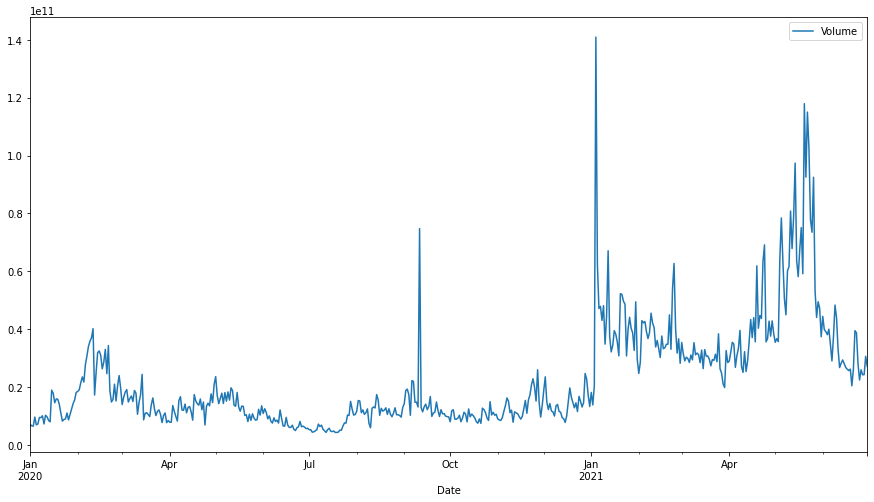

In [68]:
# Make a Plot
df.plot(figsize = (15,8))

## Analysis of Ethereum Transaction Volume

The etherium transaction volume data is taken from January 2020 to June 2021.
Based on the visualization data, it can be seen that the movement of trading transaction volume from January 2020 to December 2020 experienced fluctuations that were not too far away. This is different from the movement of trade transaction volume from January 2021 to June 2020 which experienced sharp fluctuations with an increase compared to the previous year, with the highest value of trade transaction volume being in January 2021 with a trade value of 1.4 trillion USD and the second highest in May 2021 with a value of 1.4 trillion USD. trade 1.2 trillion USD